In [1]:
import numpy as np

import era5
from era5.model import FourierRegression

%matplotlib inline

In [2]:
variable = era5.WindSpeed()

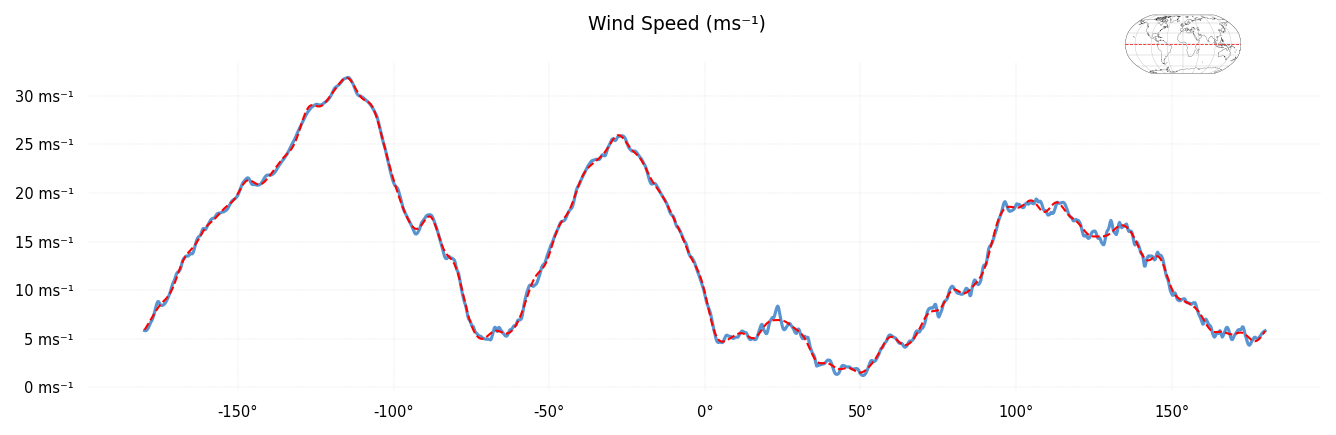


        Fourier Regression 1D:
            Data stdev: 7.8871 ms⁻¹
            MAE: 0.2399 ms⁻¹
            RMSE: 0.3092 ms⁻¹
            
            Input size: 2.81 KiBs
            Model size: 216.00 bytess
            Size Ratio: 7.50%
            
            Frequencies: 36
            Original size: 423.52 GiBs
            Compressed size: 31.76 GiBs
        


In [18]:
idx = ["TAVG-01-01 00:00", 150, 0]
model = FourierRegression(variable, idx, quantile=0.95)
model.fft()

plot = era5.plot(variable, idx)
plot.plot(color="#5894d1")
plot.plot(model.predict(), color="red", linestyle="--", linewidth=1)
plot.show()

model.describe()

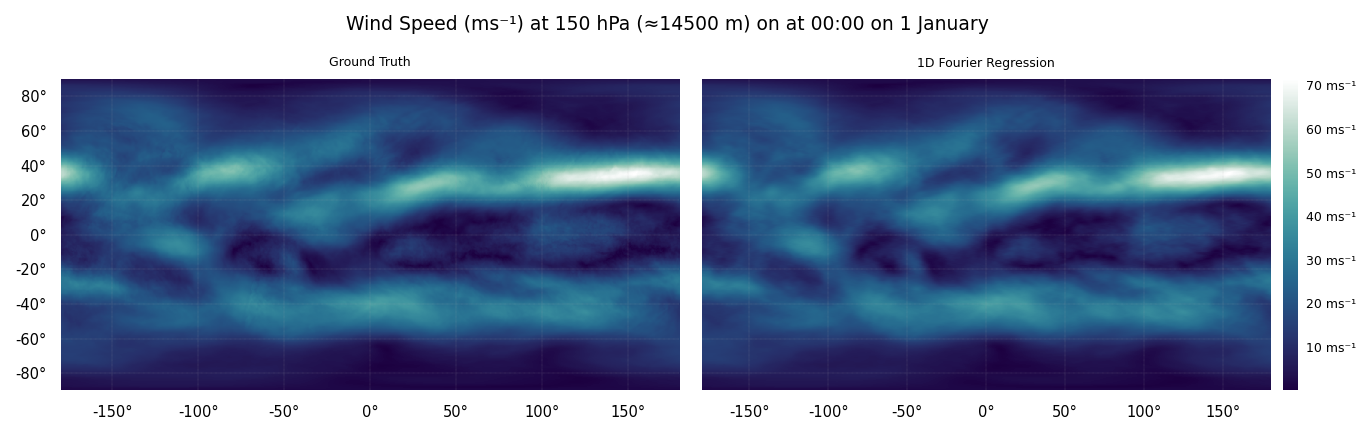

In [17]:
idx = ["TAVG-01-01 00:00", 150]
prediction = []

for lat in np.linspace(90, -90, 721, endpoint=True):
    model = FourierRegression(variable, [*idx, lat], quantile=0.95)
    model.fft()
    prediction.append(model.predict())


fig = era5.MetFigure(cols=2, sharey=True, sharex=True)

plot = era5.plot(variable, idx, axes=fig[0])
plot.plot(colorbar=False)
plot.set_ax_title("Ground Truth")

plot = era5.plot(variable, idx, axes=fig[1])
plot.plot(prediction)
plot.set_ax_title("1D Fourier Regression")

plot.show()